# Predictive Analysis of Customer Churn for a Subscription Service

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from plotly.subplots import make_subplots

## Loading the Dataset

In [6]:
df = pd.read_csv(r"D:\UPES\Semester 3\Elements of AIML Lab\Predictive Analysis of Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Exploratory Data Overview

In [9]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nNumber of rows and columns:")
print(df.shape)

print("\nColumn names and data types:")
print(df.dtypes)

print("\nSummary of the structure:")
print(df.info())

print("\nStatistical summary of numerical columns:")
print(df.describe())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

## Missing Values


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


0

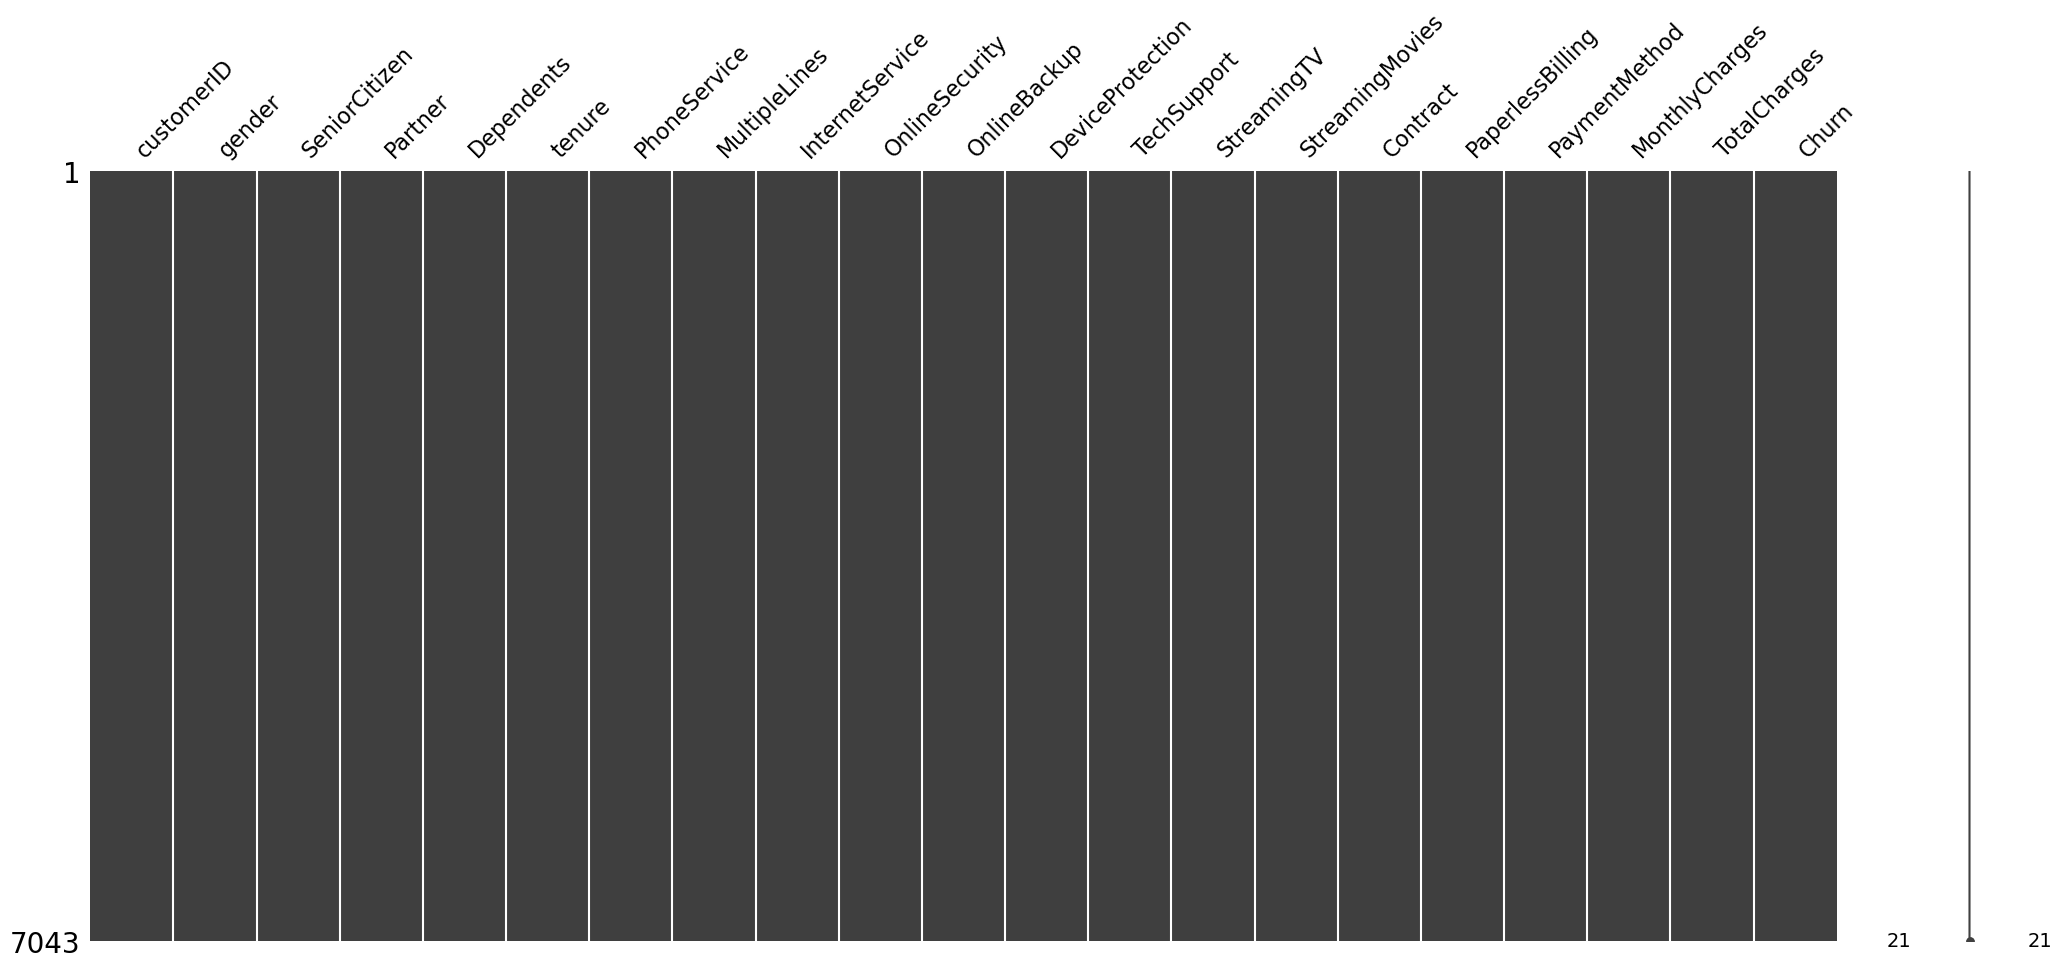

In [12]:
print("\nMissing values in each column:")
print(df.isnull().sum())

msno.matrix(df)
df.duplicated().sum()

## Exploratory Data Analysis

<Figure size 1200x800 with 0 Axes>

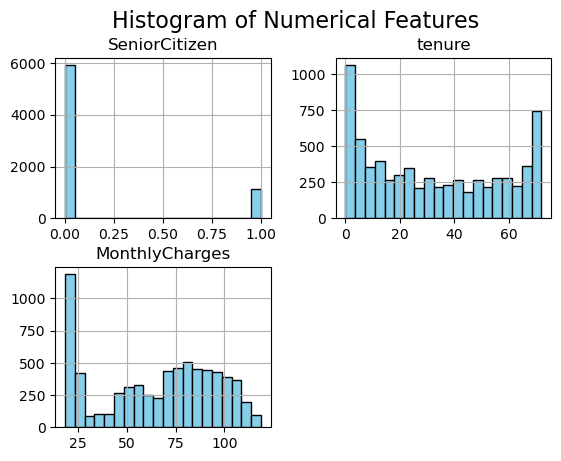

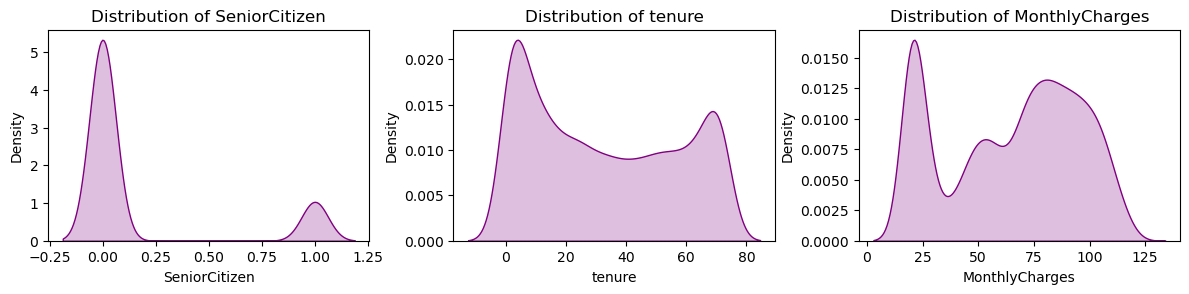

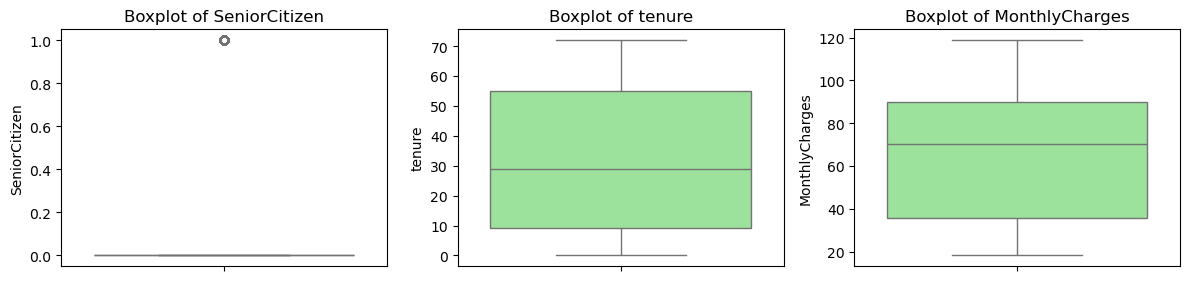

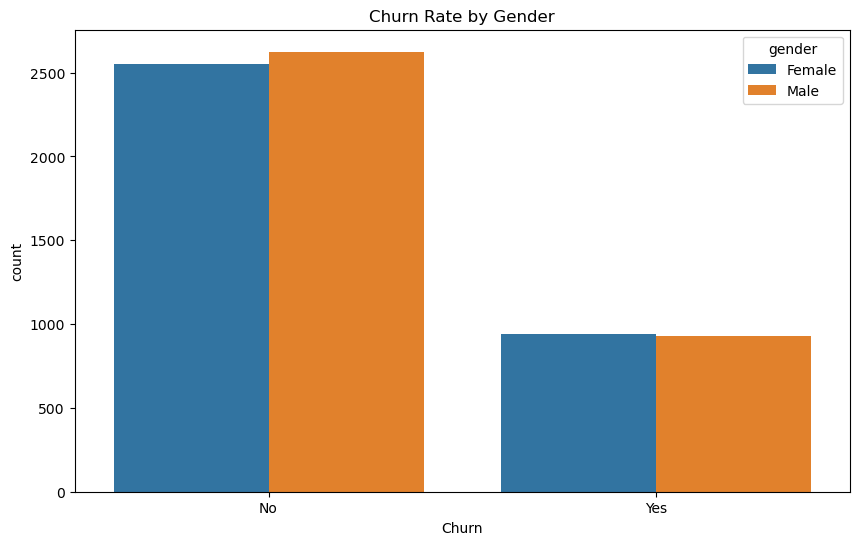

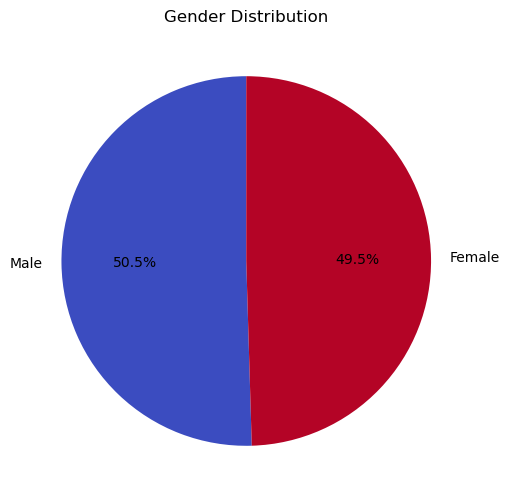

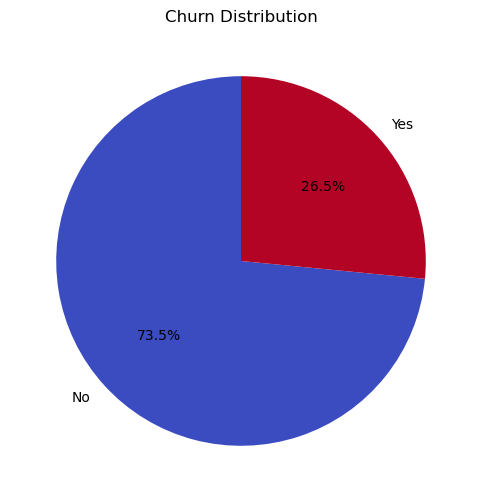

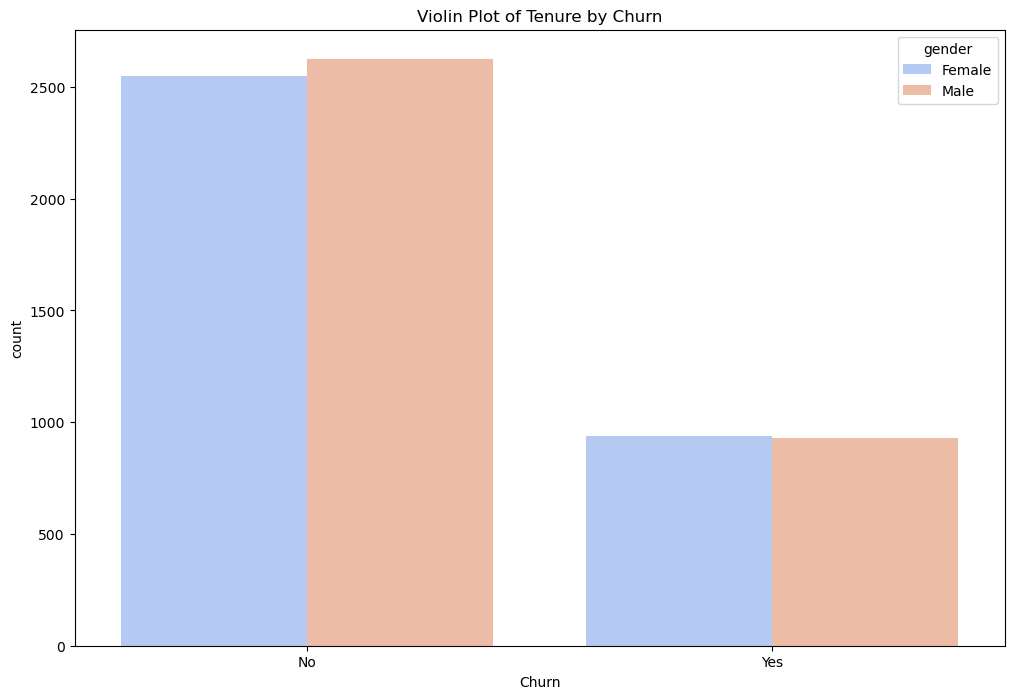

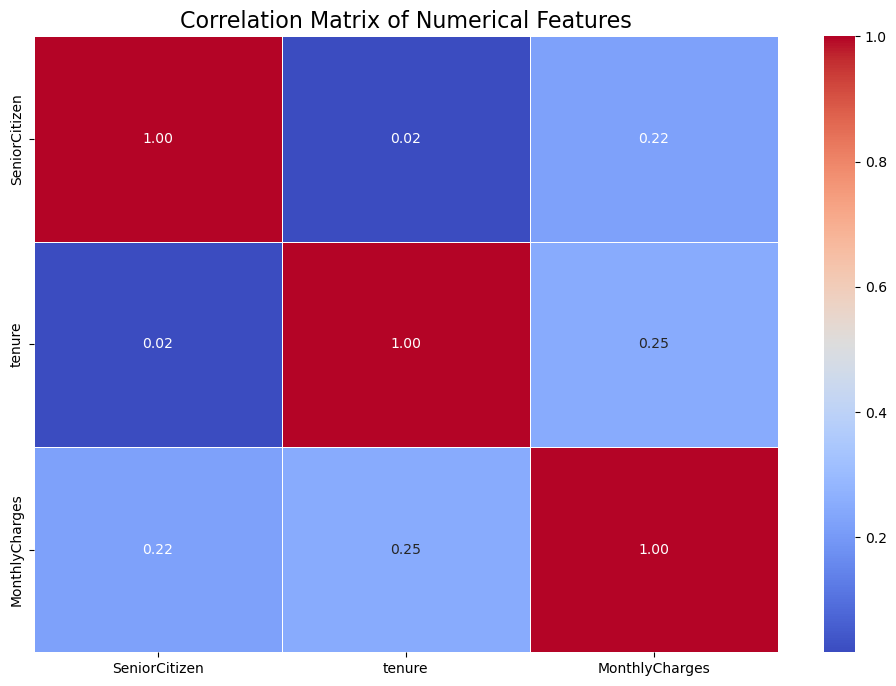

In [15]:
  # 1. Histogram of Numerical Features
  plt.figure(figsize=(12, 8))
  df.hist(bins=20, color='skyblue', edgecolor='black')
  plt.suptitle('Histogram of Numerical Features', fontsize=16)
  plt.show()


  #2. Density Plots (KDE) for Numerical Features
  numerical_cols = df.select_dtypes(include=['number']).columns
  plt.figure(figsize=(12, 8))
  for i, col in enumerate(numerical_cols, 1):
      plt.subplot(3, 3, i)
      sns.kdeplot(df[col], fill=True, color='purple')
      plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()


  # 3. Boxplot of Numerical Features by Churn
  plt.figure(figsize=(12, 8))
  for i, col in enumerate(numerical_cols, 1):
      plt.subplot(3, 3, i)
      sns.boxplot(df[col], color='lightgreen')
      plt.title(f'Boxplot of {col}')
  plt.tight_layout()
  plt.show()


  # 4. Churn Rate by Categorical Features
  plt.figure(figsize=(10, 6))
  sns.countplot(x='Churn', hue='gender', data=df)
  plt.title('Churn Rate by Gender')
  plt.show()


  # 5. Pie Charts for Gender and Churn Distribution 
  # Gender distribution
  fig, ax = plt.subplots(figsize=(6, 6))
  df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', ax=ax)
  plt.title('Gender Distribution')
  plt.ylabel('')
  plt.show()

  # Churn distribution
  fig, ax = plt.subplots(figsize=(6, 6))
  df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm', ax=ax)
  plt.title('Churn Distribution')
  plt.ylabel('')
  plt.show()


  # 6. Violin Plot for Numerical Features by Churn
  plt.figure(figsize=(12, 8))
  sns.countplot(x='Churn', hue='gender', data=df, palette='coolwarm')
  plt.title('Violin Plot of Tenure by Churn')
  plt.show()



  # 7. Correlation Matrix of Numerical Features
  # Select numerical columns from your dataframe
  numerical_cols = df.select_dtypes(include=['number']).columns

  # Compute the correlation matrix
  correlation_matrix = df[numerical_cols].corr()

  # Plotting the heatmap of the correlation matrix
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
  plt.title('Correlation Matrix of Numerical Features', fontsize=16)
  plt.show()


## Handling Outliers

In [17]:
# Before capping
print(df.describe())

# Apply capping (optimized code)
for col in numerical_cols:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=q_low, upper=q_high)

# After capping
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.372710       64.749689
std         0.368612    24.557454       30.062810
min         0.000000     1.000000       19.200000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      114.729000
